<a href="https://colab.research.google.com/github/yugonsan/pytorch_practice/blob/main/%E7%AC%AC1%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NumPyなどの配列をよく使う。リストやNumPyのように、名前から実際のデータにアクセスするのにインデックスを経由する必要のあるデータ型をコンテナデータ型と呼ぶ。

In [2]:
# ライブラリのインポート
import numpy as np
# numpyの浮動小数点の表示精度（小数点以下5桁）
np.set_printoptions(suppress=True, precision=5)

In [4]:
x = np.array([5, 7, 9])
y = x.copy()

x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


NumPyの.copy関数を用いることで別の複製された配列（単なるポインタが同じのコピーではない）ができます

In [5]:
import torch

In [8]:
x1 = torch.ones(5)
x2 = x1.data.numpy().copy()
x1[1] = -1
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


- Pytorchで扱うデータはテンソル（Tensor）というクラスのインスタンスに保存される
- x1.data.numpyでもとのテンソルを示す
- ここでも.copy()を使うことで別の配列として複製する


In [9]:
def f(x):
    return (2 * x ** 2 +2)

In [36]:
# xをNumpy配列として定義
x = np.arange(-2, 2.1 , 0.25) #始点、終点、刻み
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [37]:
# f(x)の結果にyに代入
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [14]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a5b9d327b6541fa446af384fb730cf517b5940b1eab3fecd86ed653df7aa6abb
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [38]:
import matplotlib.pyplot as plt
import japanize_matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

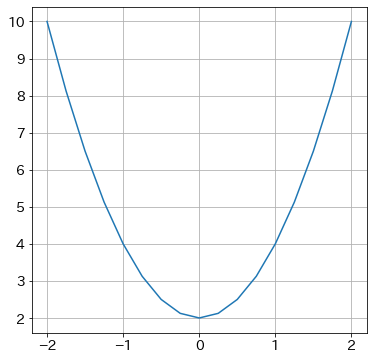

In [39]:
plt.plot(x, y)
plt.show

ここからは合成関数についてです

In [40]:
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)
def f3(x):
    return(x+2)

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


- 微分の計算
- ディープラーニングのアルゴリズムは合成関数と微分で成り立っている
- 関数の関数とは、関数を引数で受け取って、それに対して関数を返すこと
- 微分計算は数値微分と呼ばれる手法でpythonする

ここで関数を数値微分する関数``diff``を定義する。  
数値微分の計算には、普通の微分の定義式よりいい近似式である $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$を利用する。

In [41]:
# 関数を微分する関数fdiffの定義
def fdiff(f):
    # 関数fを引数に微分した結果の関数をdiffとして定義
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # fdiffの戻りは微分した結果の関数diff
    return diff

In [42]:
# 2次関数の数値微分
diff = fdiff(f)
y_dash = diff(x)
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


In [43]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

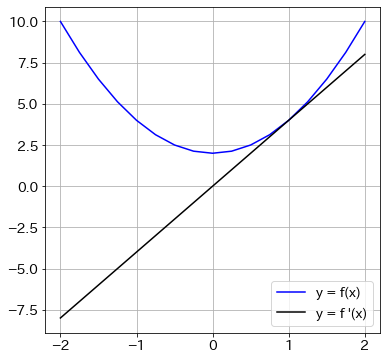

In [44]:
# 結果のグラフ表示
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

- シグモイド関数
- シグモイド関数 $g(x) = \dfrac{1}{1 + \exp(-x)}$に対して同じことをやってみる。
- e^-xをnp.exp(-x)と表す

In [45]:
# シグモイド関数の定義
def g(x):
    return 1/(1 + np.exp(-x))

In [46]:
y = g(x)
print(y)

[0.1192  0.14805 0.18243 0.2227  0.26894 0.32082 0.37754 0.43782 0.5
 0.56218 0.62246 0.67918 0.73106 0.7773  0.81757 0.85195 0.8808 ]


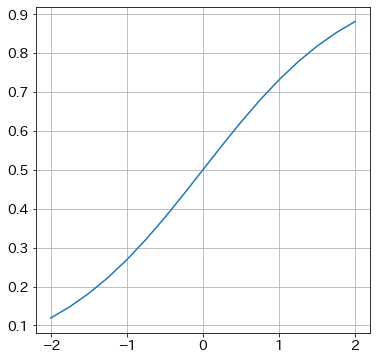

In [47]:
plt.plot(x, y)
plt.show()

In [48]:
# シグモイド関数の微分をしてみよう
# gを微分した関数を取得
diff = fdiff(g)
# diffを用いて微分結果
y_dash = diff(x)
print(y_dash)

[0.10499 0.12613 0.14915 0.1731  0.19661 0.21789 0.235   0.24613 0.25
 0.24613 0.235   0.21789 0.19661 0.1731  0.14915 0.12613 0.10499]


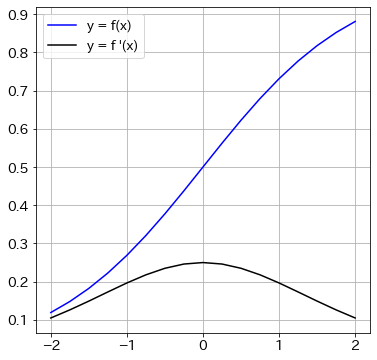

In [49]:
# 結果のグラフ表示
# 結果のグラフ表示
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

ディープラーニングの学習アルゴリズムは損失という膨大なパラメーター値を求める仕組み

- オブジェクト指向の段階
- オブジェクトという概念に一歳関係せずにプログラムをするレベル
- オブジェクトを使うがあくまでも既存のクラスのインスタンスを生成
- 独自のクラスを定義すること（独自カスタムクラス定義）
- DLはカスタムクラス定義が必要です。

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [57]:
# クラス Point の定義

class Point:
    # インスタンス生成時にxとyの２つの引数を持つ
    def __init__(self, x, y):
        # インスタンスの属性xに第一引数をセットする
        self.x = x
        # インスタンスの属性yに第二引数をセットする
        self.y = y
    # 描画関数 drawの定義 (引数はなし)
    def draw(self):
        # (x, y)に点を描画する
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

- __init__はクラスがインスタンスから生成された時に、初期化処理として必ず呼ばれる関数になる
- __init__の第1引数にあるselfという変数も重要で、インスタンス自身を指している。

In [58]:
# クラスPointからインスタンス変数p1とp2を生成する
p1 = Point(2,3)
p2 = Point(-1, -2)

In [59]:
# 生成したインスタンスp1とp2の属性にアクセスします
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


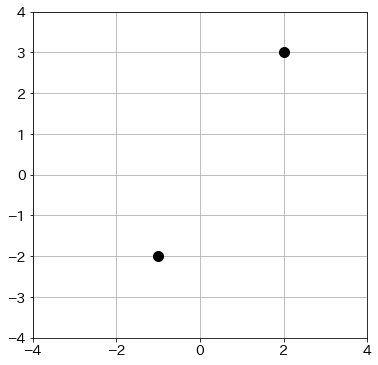

In [60]:
# draw関数の呼び出し
p1.draw()
p2.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

- クラスの継承
- 親クラスの中に小クラスを定義することで継承が可能になります

In [62]:
class Circle1(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        #x,yは親クラスの属性と設定、親クラスのsuperを呼び出している、なんでsuperなのか
        super().__init__(x,y)
        # rはCircleの属性として設定
        self.r = r

super()はPythonで使用される組み込み関数で、親クラスのメソッドを呼び出すために使用されます。 上記の例では、super().init(x,y)は親クラス（Point）の__init__メソッドを呼び出し、xとyの値をそれに渡します。これにより、Circle1クラスはPointクラスのプロパティとメソッドを継承しながら、自分自身のr属性を追加することができます。
それはサブクラスがその親クラスのメソッドや属性を使用することを可能にする。

In [63]:
c1_1 = Circle1(1, 0, 2)
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


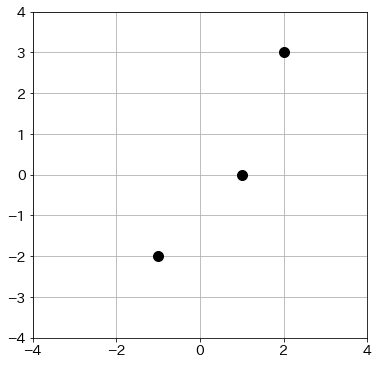

In [64]:
# p1,p2,c1_1のそれぞれがdraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

この段階でdraw関数は親で定義した関数が呼ばれていることがわかる


In [73]:
class Circle2(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        #x,yは親クラスの属性と設定、親クラスのsuperを呼び出している、なんでsuperなのか
        super().__init__(x,y)
        # rはCircleの属性として設定
        self.r = r
    
    # draw関数は、子クラス独自に円の描画を行う
    def draw(self):
        # 円の描画
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

なんでdrawの引数はselfだけで良いのですか？

draw関数は、インスタンスメソッドとして定義されているため、引数selfが必要です。selfは、メソッドが呼び出される際に、そのインスタンス自身を表す変数です。そのため、draw関数内でインスタンス変数(例えばx,y,r)を参照することができます。引数を追加することで、そのインスタンス外からのデータをdraw関数に渡すこともできますが、この例ではそれが必要ないため、selfだけの引数が使用されています。

In [74]:
# クラスCircle2からインスタンス変数c2_1を生成する
c2_1 = Circle2(1, 0, 2)

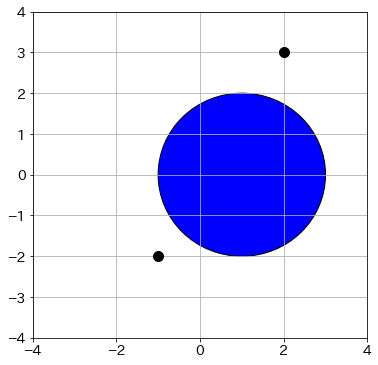

In [75]:
# p1, p2, c2_1 のそれぞれのfraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()


親のdarw関数の代わりに子のdraw関数が呼ばれたことがわかる
では、この関数と親の関数を両方呼びたいときはどうしたらいいか


In [76]:
# Pointの子クラスCircleの定義その3
class Circle3(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        super().__init__(x, y)
        # rは、Circleの属性として設定
        self.r = r
     
    # Circleのdraw関数は、親の関数呼び出しの後で、円の描画も独自に行う
    def draw(self):
        # 親クラスのdraw関数呼び出し
        super().draw()
        
        # 円の描画
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [77]:
# クラスCircle3からインスタンス変数c3_1を生成する
c3_1 = Circle3(1, 0, 2)

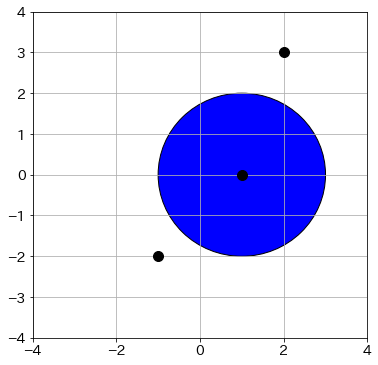

In [78]:
# p1, p2, c3_1 のそれぞれのfraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

- インスタンスを関数として扱う
- クラスから生成したインスタンスを呼び出し可能な関数にする

In [79]:
# 関数クラスHの定義
class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [80]:
# hが関数として動作することを確認する
x = np.arange(-2, 2.1, 0.25)
print(x)
# Hクラスのインスタンスとしてhを作成
h = H()

y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


<function matplotlib.pyplot.show(*args, **kw)>

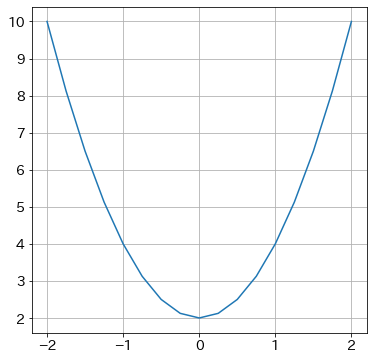

In [82]:
plt.plot(x, y)
plt.show